<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/TF_2_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
learning_rate = 0.01
training_steps = 1000

In [ ]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [ ]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
  return W * x + b

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)

  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
for step in range(1, training_steps + 1):
  run_optimization()

  if step % 50 == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}".format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 1.3413	W: 1.3432	b: 0.3728
step:  100	loss: 0.9848	W: 1.7091	b: 0.2059
step:  150	loss: 0.9483	W: 1.8141	b: 0.1300
step:  200	loss: 0.9439	W: 1.8453	b: 0.0980
step:  250	loss: 0.9434	W: 1.8549	b: 0.0850
step:  300	loss: 0.9433	W: 1.8581	b: 0.0798
step:  350	loss: 0.9433	W: 1.8591	b: 0.0778
step:  400	loss: 0.9433	W: 1.8595	b: 0.0770
step:  450	loss: 0.9433	W: 1.8596	b: 0.0767
step:  500	loss: 0.9433	W: 1.8596	b: 0.0766
step:  550	loss: 0.9433	W: 1.8597	b: 0.0766
step:  600	loss: 0.9433	W: 1.8597	b: 0.0765
step:  650	loss: 0.9433	W: 1.8597	b: 0.0765
step:  700	loss: 0.9433	W: 1.8597	b: 0.0765
step:  750	loss: 0.9433	W: 1.8597	b: 0.0765
step:  800	loss: 0.9433	W: 1.8597	b: 0.0765
step:  850	loss: 0.9433	W: 1.8597	b: 0.0765
step:  900	loss: 0.9433	W: 1.8597	b: 0.0765
step:  950	loss: 0.9433	W: 1.8597	b: 0.0765
step: 1000	loss: 0.9433	W: 1.8597	b: 0.0765


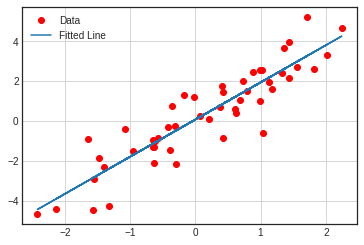

In [ ]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W * X + b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [ ]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [ ]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [ ]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [ ]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

1.5456864
-0.21357109
-0.6049523


### 데이터 지정

In [ ]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

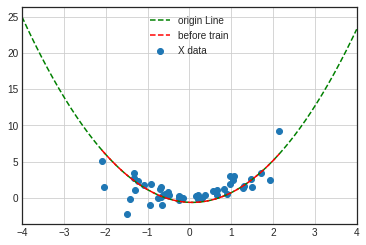

In [ ]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin Line')
plt.plot(line_x, line_y, 'r--', label='before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

### Util Functions

In [ ]:
def compupte_loss():
  pred_y = a*(np.array(X)**2) + b*np.array(X) + c
  loss = tf.reduce_mean((Y - pred_y)**2)
  return loss

### Optimizer

In [ ]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [ ]:
for epoch in range(1, epochs + 1, 1):
  optimizer.minimize(compupte_loss, var_list=[a,b,c ])

  if epoch % 100 == 0:
    print("epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a: 0.9723	b: 0.4719	c: 0.1757
epoch:  200	a: 0.9713	b: 0.4740	c: 0.1779
epoch:  300	a: 0.9713	b: 0.4739	c: 0.1779
epoch:  400	a: 0.9713	b: 0.4739	c: 0.1779
epoch:  500	a: 0.9713	b: 0.4739	c: 0.1779
epoch:  600	a: 0.9713	b: 0.4739	c: 0.1779
epoch:  700	a: 0.9713	b: 0.4739	c: 0.1779
epoch:  800	a: 0.9713	b: 0.4739	c: 0.1779
epoch:  900	a: 0.9713	b: 0.4739	c: 0.1779
epoch: 1000	a: 0.9713	b: 0.4739	c: 0.1779


### 학습 후의 회귀선

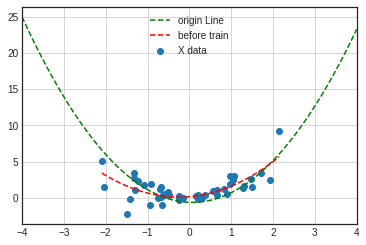

In [ ]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin Line')
plt.plot(line_x, line_y, 'r--', label='before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [ ]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [ ]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

11501568/11490434 [==============================] - 0s 0us/step


### tf.data API 사용
- 03 에서 다시 다룸 

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [ ]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

### Util Functions

In [ ]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth=num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)

  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y),1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [ ]:
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
from tensorflow.python.ops.gradients_impl import gradients
def run_optimization(x, y):
  with tf.GradientTape() as tape:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)

  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [ ]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  run_optimization(batch_x, batch_y)

  if step % 50 == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc  = accuracy(pred, batch_y)
    print("step: {:4d}\tloss: {:.4f}\taccuracy: {:4f}".format(step, loss, acc))

step:   50	loss: 7.4129	accuracy: 0.261719
step:  100	loss: 5.0915	accuracy: 0.351562
step:  150	loss: 3.3559	accuracy: 0.480469
step:  200	loss: 2.5828	accuracy: 0.578125
step:  250	loss: 1.9959	accuracy: 0.613281
step:  300	loss: 2.0128	accuracy: 0.617188
step:  350	loss: 1.6858	accuracy: 0.699219
step:  400	loss: 1.6230	accuracy: 0.664062
step:  450	loss: 1.2226	accuracy: 0.742188
step:  500	loss: 1.3975	accuracy: 0.722656
step:  550	loss: 1.2225	accuracy: 0.757812
step:  600	loss: 1.3930	accuracy: 0.718750
step:  650	loss: 1.3386	accuracy: 0.761719
step:  700	loss: 0.9961	accuracy: 0.812500
step:  750	loss: 0.7924	accuracy: 0.808594
step:  800	loss: 1.0089	accuracy: 0.808594
step:  850	loss: 0.8357	accuracy: 0.835938
step:  900	loss: 1.2227	accuracy: 0.757812
step:  950	loss: 0.9177	accuracy: 0.800781
step: 1000	loss: 1.0470	accuracy: 0.746094


###  테스트

In [ ]:
pred = logistic_regression(x_test)
print(accuracy(pred, y_test))

tf.Tensor(0.8039, shape=(), dtype=float32)


### 시각화

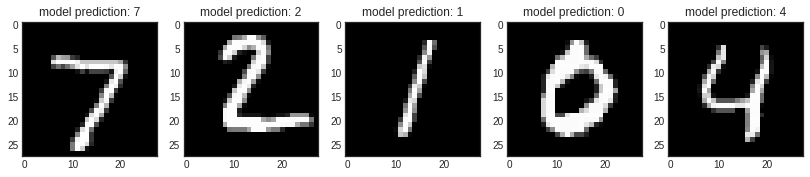

In [ ]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(14,8))
for i in range(1, num_images+1, 1):
  plt.subplot(1, num_images, i)
  plt.imshow(np.reshape(test_images[i-1], [28,28]), cmap='gray')
  plt.title("model prediction: {}".format(np.argmax(predictions.numpy()[i-1])))

plt.show()